In [ ]:
!pip install tweepy
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

consumer_key = 'aq5Jm2LlimzXJdXewCu8RNAmq'
consumer_secret = 'VIMmCarcGpStqHit6xV8W9SXMcDjJJ2vNd3CpCbD1u2wonivin'
access_token = '1379322091099463683-MyHqY18gjLlauIcNIFt7DqzSPwGL3t'
access_token_secret = '4WLoYfGVvnAQTyB2zWXoz9JPX8J0pWwYurVP4J00kmXuf'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
hashtag = "#presidentialdebate"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-05-04 12:34:47
1,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2021-05-04 12:34:38
2,RT @bavacado2: Mood #PresidentialDebate https:...,2021-05-03 20:40:48
3,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-05-02 09:45:18
4,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-05-02 08:30:44


In [ ]:
trump_handle = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_handle = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [ ]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweet'].apply(lambda x: identify_subject(x, trump_handle)) 
df['Biden'] = df['Tweet'].apply(lambda x: identify_subject(x, biden_handle))
df.head(10)

,Tweet,Timestamp,Trump,Biden
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-05-04 12:34:47,1,1
1,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2021-05-04 12:34:38,0,0
2,RT @bavacado2: Mood #PresidentialDebate https:...,2021-05-03 20:40:48,0,0
3,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-05-02 09:45:18,0,0
4,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-05-02 08:30:44,0,0
5,RT @Rkar87: #PresidentialDebate but it takes p...,2021-05-02 01:05:30,0,0
6,I remember during the #PresidentialDebate when...,2021-05-01 00:57:25,1,1
7,"RT @pseudoduke: ""Let me shut you down, Joe.""\n...",2021-04-30 17:18:30,1,1
8,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-04-30 12:19:51,0,0
9,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-04-30 12:19:24,0,0


In [ ]:
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))

In [ ]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])

polarity                       subjectivity                      
           mean amax      amin median         mean      amax amin median
Trump                                                                   
1     -0.014141  0.0 -0.155556    0.0     0.026263  0.288889  0.0    0.0

polarity                       subjectivity                  
           mean amax      amin median         mean  amax amin median
Biden                                                               
1      0.107407  0.8 -0.155556    0.0     0.173148  0.75  0.0    0.0

In [ ]:
biden = df[df['Biden']==1][['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

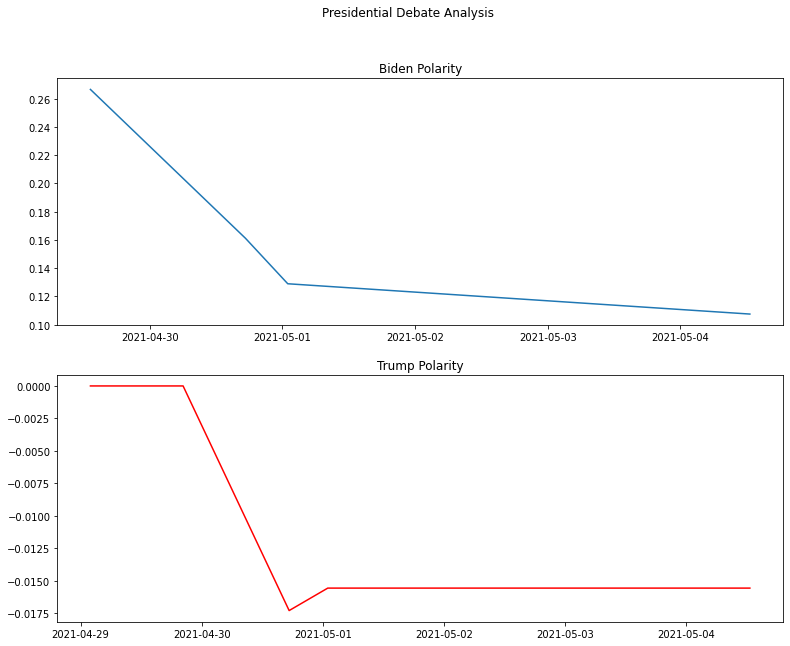

In [ ]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()

In [ ]:
df

,Tweet,Timestamp,Trump,Biden,Processed Tweet,polarity,subjectivity
0,RT @WSjp_insight: 1st US #PresidentialDebate 0...,2021-05-04 12:34:47,1,1,@WSjp_insight: 1st US 09/29/2020 🇺🇸#Debates202...,0.000000,0.000000
1,RT @WSjp_insight: 1st US #PresidentialDebate'1...,2021-05-04 12:34:38,0,0,@WSjp_insight: 1st US #PresidentialDebate'16 e...,0.000000,0.000000
2,RT @bavacado2: Mood #PresidentialDebate https:...,2021-05-03 20:40:48,0,0,@bavacado2: Mood https://t.co/VKZWHz4bts,0.000000,0.000000
3,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-05-02 09:45:18,0,0,@WSjp_insight: Final(2nd)US🇺🇸#PresidentialDeba...,0.000000,0.000000
4,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-05-02 08:30:44,0,0,@WSjp_insight: 3rd US article https://t.co/64d...,0.000000,0.000000
5,RT @Rkar87: #PresidentialDebate but it takes p...,2021-05-02 01:05:30,0,0,@Rkar87: take place blood gulch sniper https:/...,0.000000,0.000000
6,I remember during the #PresidentialDebate when...,2021-05-01 00:57:25,1,1,I remember #Biden b*tched #PresidentTrump 500 ...,0.000000,0.000000
7,"RT @pseudoduke: ""Let me shut you down, Joe.""\n...",2021-04-30 17:18:30,1,1,"@pseudoduke: ""Let shut down, Joe."" Joe Biden l...",-0.155556,0.288889
8,RT @WSjp_insight: Final(2nd)US🇺🇸#PresidentialD...,2021-04-30 12:19:51,0,0,@WSjp_insight: Final(2nd)US🇺🇸#PresidentialDeba...,0.000000,0.000000
9,RT @WSjp_insight: 3rd US #PresidentialDebate a...,2021-04-30 12:19:24,0,0,@WSjp_insight: 3rd US article https://t.co/64d...,0.000000,0.000000


In [ ]:
p=0
wp=0
sp=0
ne=0
wn=0
sn=0
n=0
a = df[df['Biden']==1]
for i in a['polarity']:
  
    if(i==0):
      n+=1
    elif(i>0 and i<=0.3):
      wp+=1
    elif(i>0.3 and i<=0.6):
      p+=1
    elif(i>0.6 and i<=1):
      sp+=1
    elif(i>-0.3 and i<=0):
      wn+=1
    elif(i>-0.6 and i<=-0.3):
      ne+=1
    elif(i>-1 and i<=-0.6):
      sn+=1

In [ ]:
b=len(a)
n=(n/b)*100
wp=(wp/b)*100
p=(p/b)*100
sp=(sp/b)*100
wn=(wn/b)*100
ne=(ne/b)*100
sn=(sn/b)*100

In [ ]:
print()
print("Detailed Report: ")
print(str(p) + "% people thought it was positive")
print(str(wp) + "% people thought it was weakly positive")
print(str(sp) + "% people thought it was strongly positive")
print(str(n) + "% people thought it was negative")
print(str(wn) + "% people thought it was weakly negative")
print(str(sn) + "% people thought it was strongly negative")
print(str(n) + "% people thought it was neutral")


Detailed Report: 
0.0% people thought it was positive
0.0% people thought it was weakly positive
16.666666666666664% people thought it was strongly positive
66.66666666666666% people thought it was negative
16.666666666666664% people thought it was weakly negative
0.0% people thought it was strongly negative
66.66666666666666% people thought it was neutral


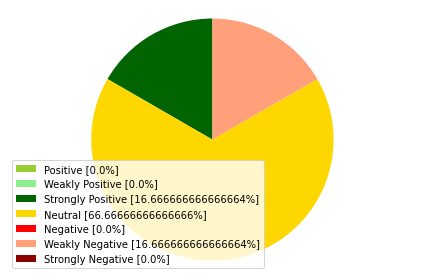

In [ ]:
labels = ['Positive [' + str(p) + '%]', 'Weakly Positive [' + str(wp) + '%]','Strongly Positive [' + str(sp) + '%]', 'Neutral [' + str(n) + '%]',
                  'Negative [' + str(ne) + '%]', 'Weakly Negative [' + str(wn) + '%]', 'Strongly Negative [' + str(sn) + '%]']
sizes = [p, wp, sp, n, ne, wn, sn]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


Detailed Report: 
0.0% people thought it was positive
0.0% people thought it was weakly positive
0.0% people thought it was strongly positive
166.66666666666669% people thought it was negative
16.666666666666664% people thought it was weakly negative
0.0% people thought it was strongly negative
166.66666666666669% people thought it was neutral


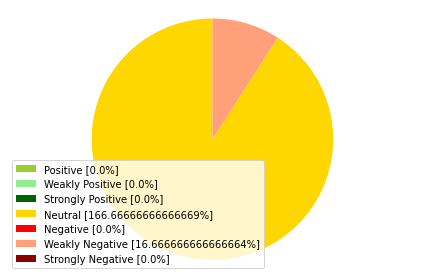

In [ ]:
p1=0
wp1=0
sp1=0
ne1=0
wn1=0
sn1=0
n1=0
t = df[df['Trump']==1]
for i in t['polarity']:
  
    if(i==0):
      n1+=1
    elif(i>0 and i<=0.3):
      wp1+=1
    elif(i>0.3 and i<=0.6):
      p1+=1
    elif(i>0.6 and i<=1):
      sp1+=1
    elif(i>-0.3 and i<=0):
      wn1+=1
    elif(i>-0.6 and i<=-0.3):
      ne1+=1
    elif(i>-1 and i<=-0.6):
      sn1+=1
b1=len(a)
n1=(n1/b1)*100
wp1=(wp1/b1)*100
p1=(p1/b1)*100
sp1=(sp1/b1)*100
wn1=(wn1/b1)*100
ne1=(ne1/b1)*100
sn1=(sn1/b1)*100
print()
print("Detailed Report: ")
print(str(p1) + "% people thought it was positive")
print(str(wp1) + "% people thought it was weakly positive")
print(str(sp1) + "% people thought it was strongly positive")
print(str(n1) + "% people thought it was negative")
print(str(wn1) + "% people thought it was weakly negative")
print(str(sn1) + "% people thought it was strongly negative")
print(str(n1) + "% people thought it was neutral")
labels = ['Positive [' + str(p1) + '%]', 'Weakly Positive [' + str(wp1) + '%]','Strongly Positive [' + str(sp1) + '%]', 'Neutral [' + str(n1) + '%]',
                  'Negative [' + str(ne1) + '%]', 'Weakly Negative [' + str(wn1) + '%]', 'Strongly Negative [' + str(sn1) + '%]']
sizes = [p1, wp1, sp1, n1, ne1, wn1, sn1]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()